In [1]:
#Importing Necessary Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt    
     

Data Given 
1) takehome_users.csv : This file contains the details of the user who have registered to the particular service. 
2) takehome_user_engagement.csv : This file contains the time stamp of all users who have logged in.

Problem Statement
1) To filter and find the Adapted user as per the Definition given and take is as the target variable for the model.
2) Do model building and find the features contributing to higher Adaption rate.


In [2]:
# Reading User Engagement and finding the list of adaptive users 
df= pd.read_csv("takehome_user_engagement.csv")

In [3]:
#Going through the data
df.head(10)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [10]:
#check for type of values 
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df["visited"].unique())
print(df["user_id"].value_counts())

             user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000       1.0
50%      5682.000000       1.0
75%      8944.000000       1.0
max     12000.000000       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None
time_stamp    0
user_id       0
visited       0
dtype: int64
[1]
3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64


In [ ]:
#changeing the Datatype and removing the Visited Column 
df['time_stamp']=pd.to_datetime(df['time_stamp'])
df['dates'] = df['time_stamp'].dt.date
df.drop(["time_stamp","visited"],axis=1, inplace=True)

In [30]:
#function to check for Adaptive users
def ada_user(df):
    list1=sorted(set(df["dates"].tolist()))
    for i in range(0,len(list1)-2):
        x=(list1[i+2]-list1[i]).days
        if 3<x<7 :
             return True
    return False

#Looping over all unique user ids
adaptive_user=[]
a=df["user_id"].unique()
for i in a:  
    date_df=df[df["user_id"] == i]
    if ada_user(date_df):
        adaptive_user.append(i)
print(len(adaptive_user))


1557


In [31]:
#Reading the User Details File 
df2= pd.read_csv("takehome_users.csv", encoding='latin-1')

In [33]:
#Reading its data 
print(df2.describe())
print(df2.info())
print(df2.isnull().sum())


         object_id  last_session_creation_time  opted_in_to_mailing_list  \
count  12000.00000                8.823000e+03              12000.000000   
mean    6000.50000                1.379279e+09                  0.249500   
std     3464.24595                1.953116e+07                  0.432742   
min        1.00000                1.338452e+09                  0.000000   
25%     3000.75000                1.363195e+09                  0.000000   
50%     6000.50000                1.382888e+09                  0.000000   
75%     9000.25000                1.398443e+09                  0.000000   
max    12000.00000                1.402067e+09                  1.000000   

       enabled_for_marketing_drip        org_id  invited_by_user_id  
count                12000.000000  12000.000000         6417.000000  
mean                     0.149333    141.884583         5962.957145  
std                      0.356432    124.056723         3383.761968  
min                      0.000000  

In [44]:
#Dropping the Name, creation time, email as it is not needed
df2.drop(["creation_time","name","email" ], axis=1, inplace=True)
#Dropping cloumns with very high null value as if cannout be filled 
df2.drop(["last_session_creation_time","invited_by_user_id"], axis=1, inplace=True)
#adding target variable 
df2['Target']=df2['object_id'].apply(lambda x:1 if x in adaptive_user else 0)

In [45]:
#Doing one hot encodeing for the creation sourse column as it as 5 categorical values 
df2 = pd.get_dummies(df2, columns=["creation_source"], prefix=["CSR"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   object_id                   12000 non-null  int64
 1   opted_in_to_mailing_list    12000 non-null  int64
 2   enabled_for_marketing_drip  12000 non-null  int64
 3   org_id                      12000 non-null  int64
 4   CSR_GUEST_INVITE            12000 non-null  uint8
 5   CSR_ORG_INVITE              12000 non-null  uint8
 6   CSR_PERSONAL_PROJECTS       12000 non-null  uint8
 7   CSR_SIGNUP                  12000 non-null  uint8
 8   CSR_SIGNUP_GOOGLE_AUTH      12000 non-null  uint8
 9   Target                      12000 non-null  int64
dtypes: int64(5), uint8(5)
memory usage: 527.5 KB


### EDA


In [62]:
for i in df2.columns:
    print(df2[i].value_counts())

1        1
8004     1
7995     1
7996     1
7997     1
        ..
4003     1
4004     1
4005     1
4006     1
12000    1
Name: object_id, Length: 12000, dtype: int64
0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64
0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64
0    9837
1    2163
Name: CSR_GUEST_INVITE, dtype: int64
0    7746
1    4254
Name: CSR_ORG_INVITE, dtype: int64
0    9889
1    2111
Name: CSR_PERSONAL_PROJECTS, dtype: int64
0    9913
1    2087
Name: CSR_SIGNUP, dtype: int64
0    10615
1     1385
Name: CSR_SIGNUP_GOOGLE_AUTH, dtype: int64
0    10443
1     1557
Name: Target, dtype: int64


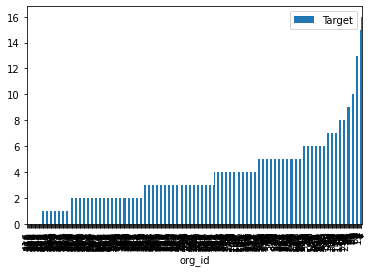

In [63]:
x = pd.DataFrame(df2.groupby('org_id')['Target'].sum())
x.sort_values(by = 'Target', inplace=True)
x.plot(kind='bar')
plt.show()

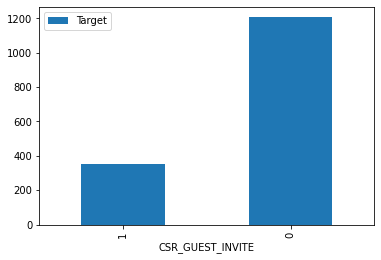

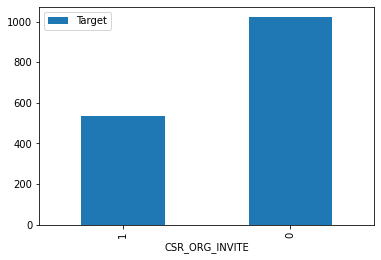

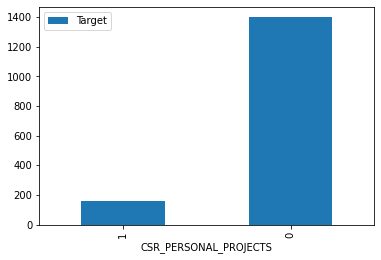

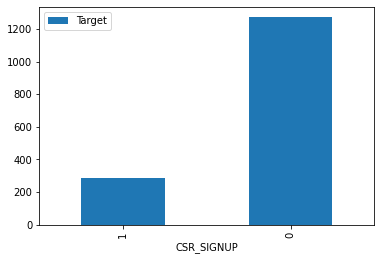

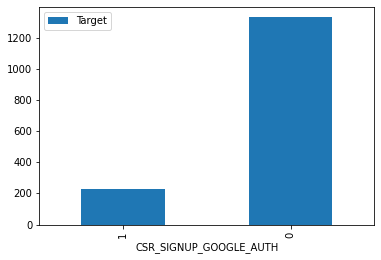

In [66]:
for i in ['CSR_GUEST_INVITE', 'CSR_ORG_INVITE', 'CSR_PERSONAL_PROJECTS','CSR_SIGNUP', 'CSR_SIGNUP_GOOGLE_AUTH']:
    x = pd.DataFrame(df2.groupby(i)['Target'].sum())
    x.sort_values(by = 'Target', inplace=True)
    x.plot(kind='bar')
    plt.show()

## Model Building 


In [51]:
#List of columns to use for model builing
List= ['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'org_id', 'CSR_GUEST_INVITE', 'CSR_ORG_INVITE', 'CSR_PERSONAL_PROJECTS',
       'CSR_SIGNUP', 'CSR_SIGNUP_GOOGLE_AUTH']

0.8361111111111111
[0.08966461 0.07409961 0.73280432 0.0311905  0.01522965 0.01072751
 0.01787025 0.02841355]


C:\Users\HOME\Documents\VS CODE PYTHON\STMLINE\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


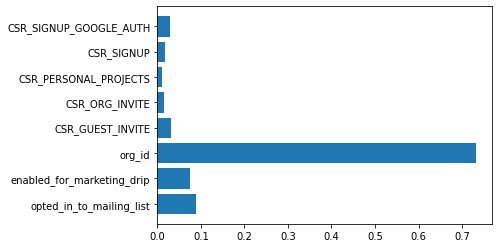

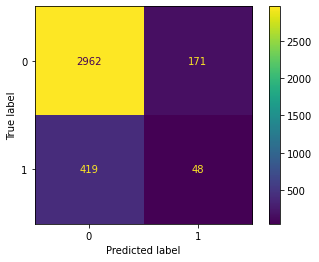

In [56]:
#Decision Tree Classifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix
X = df2.iloc[:,[1,2,3,4,5,6,7,8]] #All cols except adopted_user,user_id and creation_time
Y =df2.iloc[:,[9]] 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2,stratify=Y)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(model.feature_importances_)
plt.barh(range(len(model.feature_importances_)), model.feature_importances_, tick_label=List)
plot_confusion_matrix(model,x_test,y_test)
plt.show()

0.8325
[0.00945041 0.00942636 0.96156579 0.00403639 0.00281853 0.00733819
 0.00236959 0.00299474]


C:\Users\HOME\Documents\VS CODE PYTHON\STMLINE\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


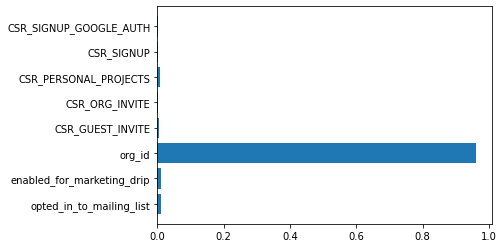

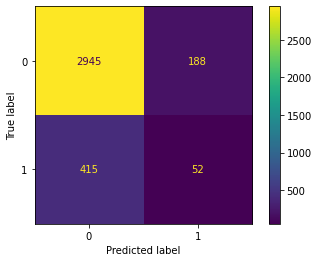

In [58]:
#Random Forest Classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix
X = df2.iloc[:,[1,2,3,4,5,6,7,8]] #All cols except adopted_user,user_id and creation_time
Y =df2.iloc[:,9] 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2,stratify=Y)
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(model.feature_importances_)
plt.barh(range(len(model.feature_importances_)), model.feature_importances_, tick_label=List)
plot_confusion_matrix(model,x_test,y_test)
plt.show()

## Conclusions 

1) The given data is 12000 unique users registered, upon analysis, we found #1557 adapted users. This makes the given dataset imbalanced. 

2) Upon doing feature analyses by building two models, a Decision Tree and Random Forest, the feature importance is found in this order. 
1) Organisation Id
2) Enabled for marketing drip
3) opted in for the Mailing list 
4) People created an account for Personal Project 

3) From the analysis it is observed that the rate of Adaptive users is highly dependent on the Organisation id. People from certain organisation id highly use this platform.
